# INFO 370 PS3
*Name: Brian Park*

List your collaborators here:
1. Jae Sang Woo

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Explore Distributions

In [91]:
def LN(mu, sigma, size):
    return np.random.lognormal(mu, sigma, size = size)

In [92]:
def EX(mu, sigma):
    return np.exp(mu + (0.5*(sigma)**2))

In [93]:
def EV(mu, sigma):
    return ((np.exp(2*mu + (sigma**2))) * (np.exp(sigma**2) - 1))

#### 1.1 Basic properties

1. (1pt) Choose your sample size S. 10,000 is a good number.
2. (3pt) Explore the shape of the distribution: draw S random numbers from LN(0, 0.2) (i.e. µ = 0 and σ = 0.2), LN(0, 0.5) and LN(0, 1.68). Display all these samples on a histogram while labeling clearly which one is which one. Do the histograms in two ways: a) linear-linear scale, and b) log-linear (x is log and y is linear). You can just do histogram of log x instead of x (you can also set log scale in matplotlib, but the bin widths will look weird). Comment the shape of histograms: do they look skewed? Do they look normal? Note: it is hard to put both histogram of x and histogram of log x on the same figure. Rather do different plots.
3. (3pt) Look at the histograms and tell-what do you think, which one describes the least unequal distribution, and which one the most unequal distribution?
4. (3pt) Compute sample means and variance (just use np.mean and such functions), and compare those with what you get using the corresponding theoretical formulas (2) and (3). Are these similar?

In [94]:
#1.1-1
S = 10_000
print(S)

10000


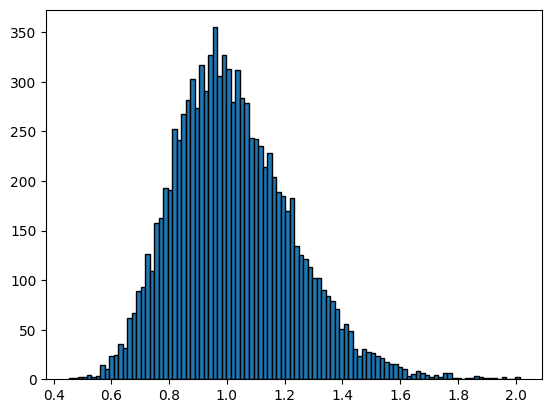

In [95]:
#1.1-2-LN(0, 0.2) / l-l scale
S1 = LN(0, 0.2, S)
_ = plt.hist(S1, bins = 100, edgecolor = "black")

This histogram looks slightly right-skewed.

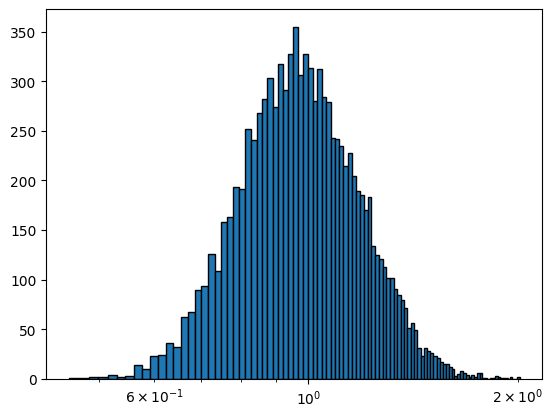

In [96]:
#1.1-2-LN(0, 0.2) / log-l scale
_ = plt.hist(S1, bins = 100, edgecolor = "black")
_ = plt.xscale("log")

This histogram almost looks normal.

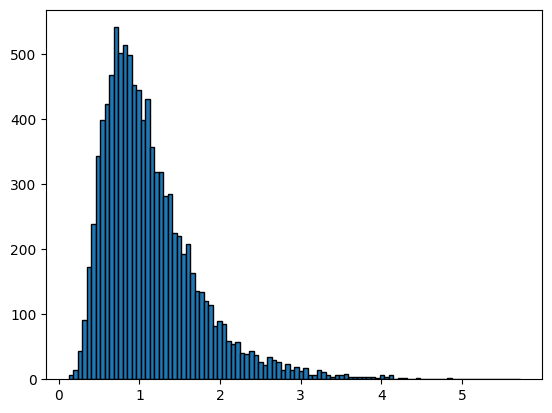

In [97]:
#1.1-2-LN(0, 0.5) / l-l scale
S2 = LN(0, 0.5, S)
_ = plt.hist(S2, bins = 100, edgecolor = "black")

This histogram looks more right-skewed than the first historgram.

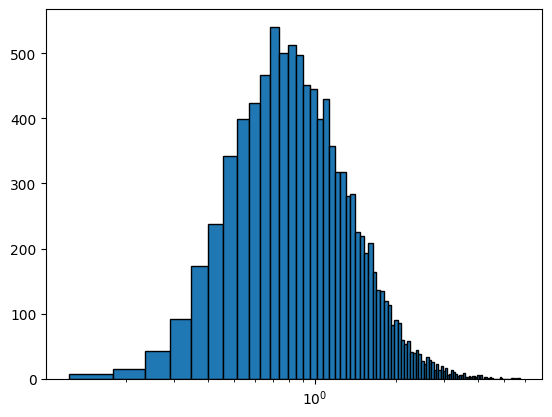

In [98]:
#1.1-2-LN(0, 0.5) / log-l scale
_ = plt.hist(S2, bins = 100, edgecolor = "black")
_ = plt.xscale("log")

This histogram looks normal, but the right-hand side is denser.

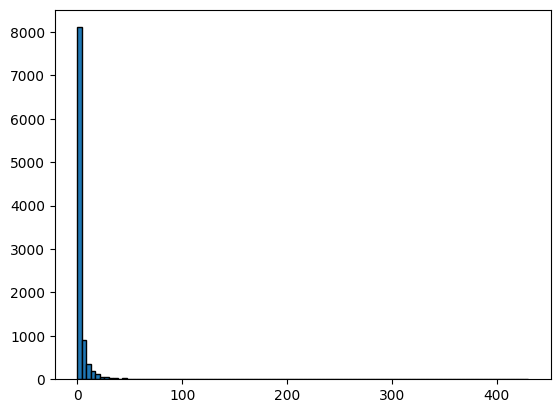

In [99]:
#1.1-2-LN(0, 1.68) / l-l scale
S3 = LN(0, 1.68, S)
_ = plt.hist(S3, bins = 100, edgecolor = "black")

This histogram looks extremely right-skewed.

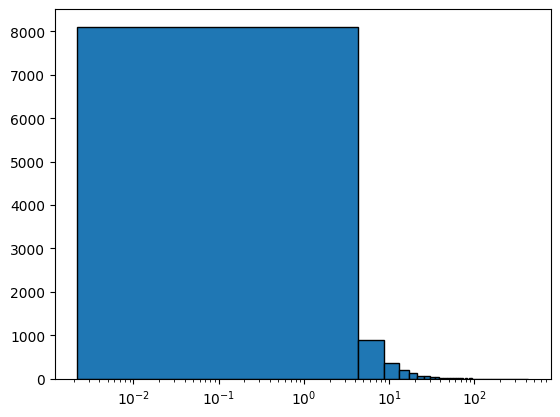

In [100]:
#1.1-2-LN(0, 1.68) / log-l scale
_ = plt.hist(S3, bins = 100, edgecolor = "black")
_ = plt.xscale("log")

This histogram looks right-skewed and y-values show an extreme decline.

In [101]:
#1.1-3

According to the histograms above, LN(0, 0.2) sample has the least unequal distribution because it is almost close to normal. Conversely, LN(0, 1.68) sample has the most unequal distribution because it is extremely right-skewed.

In [102]:
#1.1-4-LN(0, 0.2) - Sample Mean, Sample Variance
(np.mean(S1), np.var(S1))

(1.022043928798349, 0.04157889010810203)

In [103]:
#1.1-4-LN(0, 0.2) - Theoretical Values
(EX(0, 0.2), EV(0, 0.2))

(1.0202013400267558, 0.04247629348257031)

Both sample values and theoretical values are very similar to each other.

In [104]:
#1.1-4-LN(0, 0.5) - Sample Mean, Sample Variance
(np.mean(S2), np.var(S2))

(1.1323530110182152, 0.36319999504090145)

In [105]:
#1.1-4-LN(0, 0.5) - Theoretical Values
(EX(0, 0.5), EV(0, 0.5))

(1.1331484530668263, 0.3646958540123865)

Both sample values and the theoretical values are quite similar to each other, but less similar than the first sample.

In [106]:
#1.1-4-LN(0, 1.68) - Sample Mean, Sample Variance
(np.mean(S3), np.var(S3))

(3.983233078220626, 165.41029666556656)

In [107]:
#1.1-4-LN(0, 1.68) - Theoretical Values
(EX(0, 1.68), EV(0, 1.68))

(4.1008735008239405, 265.99982369887033)

Both sample values and theoretical values are not similar to each other. Particularly, there is a big difference between the sample and theoretical variance.

## 1.2 The Pareto principle 

1. (22pt) Compute the 20/80 ratio for all these three distributions. Consult lecture notes, Section “Describing Data” and subsection “80-20 rule (Pareto principle)”, page 15 for now; and python notes, Ch 7.4.1 “80-20 ratio”. Imagine the random numbers describe income. You can compute Pareto ratios in the following way (but other solutions are ok too): (a) Compute the total income in your sample (i.e. sum of all values) (b) pick a quantile (say, upper 10%). Find the corresponding income threshold in the sample. You can use np.percentile, in this case it would be np.percentile(x, 90) for the top-10 pct threshold (this is the same as lower 90th percentile, so that’s why “90”). (c) Find the total income of the top-10 pct by just summing all income values that are larger than the threshold. (d) Compute the wealth share of the top-10 pct. Is this more than 90%? If yes then you should look at a smaller top percentage (e.g. 9pct). If not, look for a larger percentage (e.g 11pct). (e) In practice, you want to loop over top percentages (e.g. from 1% to 50%) and see where you get close to correct ratio. Hint: the answers are approximately 54, 60, 80 (plus/minus a pct or so). Hint2: it is easier for you to handle these questions here if you write the code as a function that takes the data (random numbers) in as an argument.

2. (3pt) Which distribution is the most unequal one? Which one the most equal one? Does this corresponds to what did you guess based on the visual impression based on the histograms?

In [108]:
#1.2-1-a
total = (np.sum(S1), np.sum(S2), np.sum(S3))
total

(10220.439287983489, 11323.530110182151, 39832.330782206256)

In [109]:
def perc(SMP, per):
    return np.percentile(SMP, per)

In [110]:
#1.2-1-b-upper 10%-corresponding income threshold
threshold = (perc(S1, 90), perc(S2, 90), perc(S3, 90))
print(threshold)

(1.2939901484589462, 1.8828918087338287, 8.558229815083205)


In [111]:
#1.2-1-c-total income of the top-10 pct
top10 = (S1[S1 > threshold[0]].sum(), S2[S2 > threshold[1]].sum(), S3[S3 > threshold[2]].sum())
top10

(1418.9836529127365, 2462.9165489665065, 25830.22490021521)

In [112]:
#1.2-1-d-wealth share of the top-10 pct
share = (top10[0]/total[0], top10[1]/total[1], top10[2]/total[2]) 
share

(0.13883783396483582, 0.21750430519470645, 0.6484738500854684)

All shares are less than 90%.

In [113]:
#1.2-1-d
threshold = (perc(S1, 89), perc(S2, 89), perc(S3, 89))
top10 = (S1[S1 > threshold[0]].sum(), S2[S2 > threshold[1]].sum(), S3[S3 > threshold[2]].sum())
share = (top10[0]/total[0], top10[1]/total[1], top10[2]/total[2]) 
share

(0.15143553339309745, 0.2339204875449987, 0.6689683078067109)

They are still less than 90%.

In [114]:
#1.2-1-e
def ratio(SMP, total):
    for pct in range(99, 50, -1):
        threshold = np.percentile(SMP, pct)
        share = SMP[SMP > threshold].sum()/total
        if 100*share > pct:
            result = (pct, share)
            break
    return result
ratios = (ratio(S1, total[0]), ratio(S2, total[1]), ratio(S3, total[2]))
print(ratios)

((53, 0.5490134737428987), (59, 0.6076544891784464), (79, 0.8050770789192239))


* In the first distribution, the richest 47% earn approximately 55% of total income.
* In the second distribution, the richest 41% earn approximately 61% of total income.
* In the third distribution, the richest 21% earn approximately 80% of total income.

In [115]:
#1.2-2

Based on the results above, the third distribution is the most unequal one while the first distribution is the most equal one. Also, each corresponds to my guess based on a visual impression made from the histograms in 1-1.

## 1.3 Inequality in data

1. (2pt) Load both datasets and do basic checks—do the values of interest (number of citations and income) look reasonable?
2. (4pt) Show the distribution of income and citations on a histogram. As the histogram may not look good, do it in two ways: a) histogram of income/citations and b) histogram of log income/citations. In order to avoid issues with log of zero you can do log(1 + income) instead of log income.
3. (3pt) Compute sample mean and standard deviation for both datasets. Compare these: how much smaller (or larger) is std. dev compared to the mean?
4. (6pt) Compute the 20/80 ratio for both distributions. You can re-use your code from Section 1.2.


In [116]:
#1.3-1
dfTrt = pd.read_csv("../data/treatment.csv.bz2", sep = "\t")
dfCts = pd.read_csv("../data/mag-30k-citations.csv.bz2", sep = "\t")

FileNotFoundError: [Errno 2] No such file or directory: '../data/treatment.csv.bz2'

In [ ]:
#1.3-1
(dfTrt.re78.sum(), dfCts.citations.sum())

(54843856.0104, 468169)

The sum of the values looks reasonable because there would be more numbers of income compared to citations.

In [ ]:
#1.3-1
dfTrt.re78.sample(5)

2360     9605.22
1203    17732.70
2573    22165.90
2336     9900.77
330      7388.63
Name: re78, dtype: float64

The values of income in 1978 looks reasonable because the numbers are quite large enough.

In [ ]:
#1.3-1
dfCts.citations.sample(5)

2043       7
6437      40
6046      14
1709     218
26495      0
Name: citations, dtype: int64

The values of citations look reasonable and surprisingly one paper has been cited 218 times.

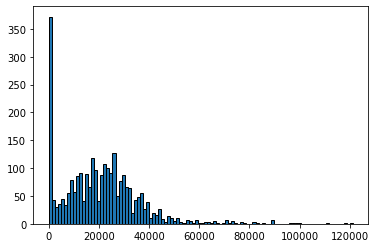

In [ ]:
#1.3-2-a-histogram of income
_ = plt.hist(dfTrt.re78, bins = 100, edgecolor = "black")

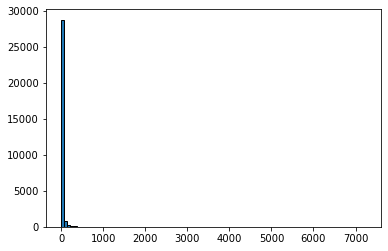

In [ ]:
#1.3-2-a-histogram of citations
_ = plt.hist(dfCts.citations, bins = 100, edgecolor = "black")

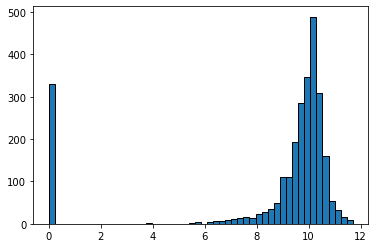

In [ ]:
#1.3-2-b-histogram of income(log)
_ = plt.hist(np.log(1 + dfTrt.re78), bins = 50, edgecolor = "black")

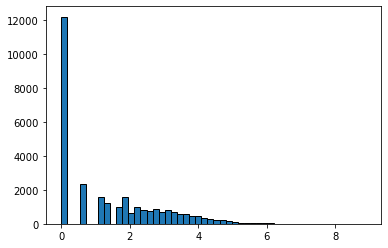

In [ ]:
#1.3-2-b-histogram of citations(log)
_ = plt.hist(np.log(1 + dfCts.citations), bins = 50, edgecolor = "black")

In [ ]:
#1.3-3-dfTrt
valuesTrt = (np.mean(dfTrt.re78), np.std(dfTrt.re78))
print(valuesTrt)

(20502.37607865417, 15629.597534767552)


The standard deviation of this dataset is about 4873 smaller compared to the mean.

In [ ]:
#1.3-3-dfCts
valuesCts = (np.mean(dfCts.citations), np.std(dfCts.citations))
print(valuesCts)

(15.605633333333333, 79.1767834759606)


The standard deviation of this dataset is about 64 larger compared to the mean.

In [ ]:
#1.3-4

In [ ]:
totals = (np.sum(dfTrt.re78), np.sum(dfCts.citations))
ratios = (ratio(dfTrt.re78, totals[0]), ratio(dfCts.citations, totals[1]))
print(ratios)

((63, 0.6474562618876845), (82, 0.8325220166222027))


* In the first distribution, the richest 37% earn approximately 65% of total income. 
* In the second distribution, the most cited 18% of papers capture about 83.3% of all citations.

## 2. Explore Central Limit Theorem

1. (7pt) Calculate the expected value and variance of this random variable.
2. (1pt) Choose your number of repetitions R. 1000 is a good number but you can also take 10,000 or 100,000 to get smoother histograms.
3. (5pt) Create a vector of R random realizations of X. Make a histogram of those. Comment the shape of the histogram.
4. (2pt) Compute and report mean and variance of the sample you created (just use np.mean and np.var).
5. (5pt) Now create R pairs of random realizations of X (i.e. sample size S = 2). For each pair, compute its mean. You should have R mean values. Make the histogram. How does this look like?
6. (6pt) Compute and report mean of the R pair means, and variance of the means.
7. (4pt) Compute the expected value and variance of the pair means, i.e. the theoretical concepts. This mirrors what you did in 1. Compare the theoretical values with the sample values above. Are those fairly similar?
8. (4pt) Now instead of pairs of random numbers, repeat this with 5-tuples of random numbers (i.e. S = 5 random numbers per one repetition, and still the same R = 1000 or whatever you chose repetitions in total). Compare the theoretical and sample version of mean and variance of 5-tuples. Are they similar? Do you spot any noticeable differences in the histogram compared to your previous histogram?
9. (3pt) Repeat with 25-tuples... (Also compute the expectation and theoretical variance, and compare those with sample mean, sample variance)
10. (3pt) ... and with 1000-tuples. Do not forget to compare with theoretical results.
11. (2pt) Comment on the tuple size, and how the shape of the histogram changes when the tuple size increases.
12. (6pt) Explain why do the histograms resemble normal distribution as S grows. In particular, explain what happens when we move from single values S = 1 to pairs S = 2. Why did two equal peaks turn into a “山”-shaped histogram?
13. (2pt) Explain what is the difference between R and S. How do changing these values affect the histograms?

In [ ]:
#2-1
EX = (-1 * 0.5) + (1 * 0.5)
Evar = (((-1-EX)**2)*0.5) + (((1-EX)**2)*0.5)
(EX, Evar)

(0.0, 1.0)

In [ ]:
#2-2
R = 1000
print(R)

1000


In [ ]:
def rep(S, vec):
    for i in range(R):
        x = np.random.randint(0, 2, S) * 2 - 1
        vec.append(np.mean(x))
    return vec

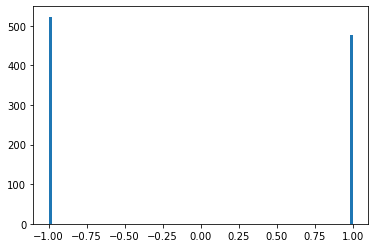

In [ ]:
#2-3
S = 1
vec = []
_ = plt.hist(rep(S, vec), bins = 100)

The shape of the histogram above has two distinct peaks because only two different values could be generated - -1, 1.

In [ ]:
#2-4
(np.mean(vec), np.var(vec))

(-0.046, 0.997884)

The sample values above are fairly similar to the theoretical values computed at 2-1.

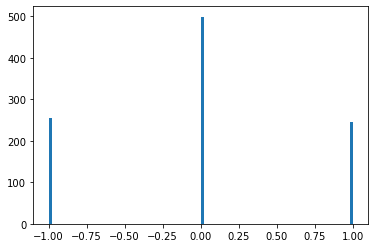

In [ ]:
#2-5
S = 2
vec = []
_ = plt.hist(rep(S, vec), bins = 100)

Increasing the size to 2, the histogram is now able to have the mean value of 0. The shape of the histogram looks slightly more normal than the first one with size 1.

In [ ]:
#2-6
(np.mean(vec), np.var(vec))

(-0.011, 0.5008790000000001)

In [ ]:
#2-7
EX = (-1 * 0.5) + (1 * 0.5)
Evar = (((-1-EX)**2)*0.5) + (((1-EX)**2)*0.5)
(EX, Evar)

(0.0, 1.0)

The sample mean is fairly similar to the theoretical mean value, but the sample variance was reduced by half as increasing the size to 2.

(0.0016000000000000022, 0.19519743999999997, 0.0, 1.0)

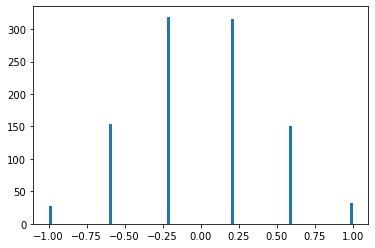

In [ ]:
#2-8
S = 5
vec = []
_ = plt.hist(rep(S, vec), bins = 100)
(np.mean(vec), np.var(vec), EX, Evar)

The sample mean is getting closer to the theoretical mean value as increasing the sample size. However, the sample variance is getting less similar to the theoretical variance as increasing the sample size. The sample variance is about 1/5 of the expected variance. I found that the histogram above looks more normal compared to the previous histogram.

(-0.0010399999999999986, 0.04259731840000001, 0.0, 1.0)

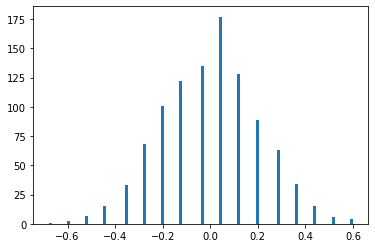

In [ ]:
#2-9
S = 25
vec = []
_ = plt.hist(rep(S, vec), bins = 100)
(np.mean(vec), np.var(vec), EX, Evar)

The sample mean is very similar to the theoretical mean value while the sample variance is getting further away from the theoretical variance. The sample variance is about 1/25 of the expected variance.

(-0.00175, 0.0009743735, 0.0, 1.0)

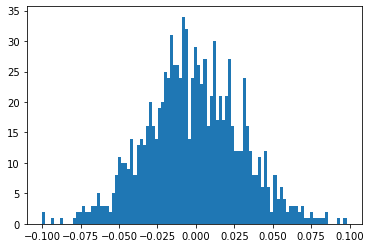

In [ ]:
#2-10
S = 1000
vec = []
_ = plt.hist(rep(S, vec), bins = 100)
(np.mean(vec), np.var(vec), EX, Evar)

The sample mean is very close to the theoretical mean, but the sample variance is also close to 0, which is getting further away from the theoretical variance 1. The sample variance is about 1/1000 of the expected variance.

In [ ]:
#2-11

The shape of the histogram becomes more normal as increasing the tuple size because a more sample size causes more accuracy in the mean value.

In [ ]:
#2-12

When we move from S = 1 to S = 2, the sample size increases at individual realizations. Therefore, each realization can have two different values, -1 and 1, which causes the mean value of 0. This made two equal peaks turn into a “山”-shaped histogram.

In [ ]:
#2-13

Changing S values affect the graph or dataset to become a more normal distribution. On the other hand, changing R values affect the graph to look smoother by having more possible mean values.

#### How much time did you spend on this PS?
- I spent almost 9 hours on this PS.